Dataset Overview:
Shape: (72134, 4)

Data Types:
Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

First 5 rows:
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  

Missing Values:
Unnamed: 0      0
title         558
text

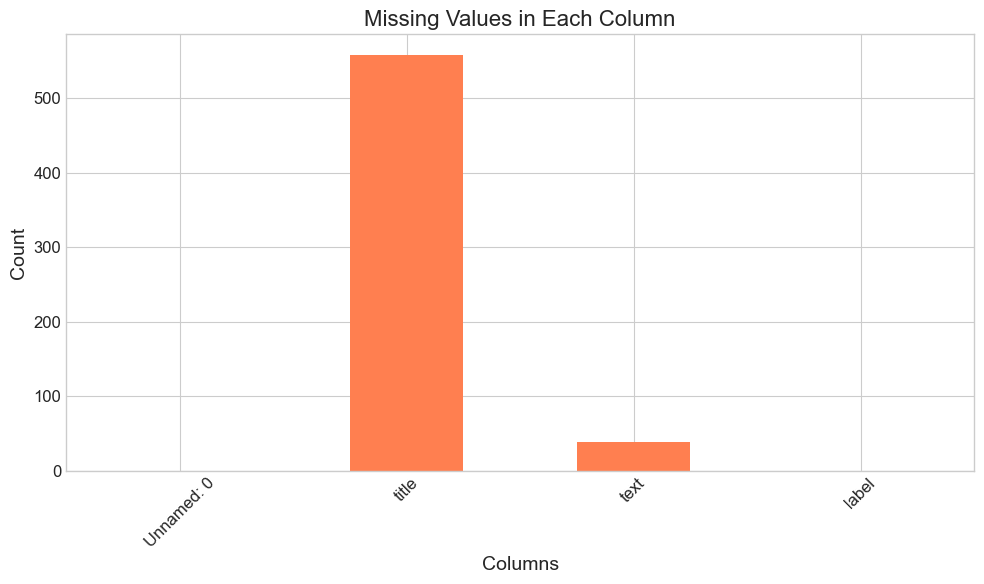

C:\Users\hp\AppData\Local\Temp\ipykernel_3020\1635219062.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['text'].fillna('Unknown', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_3020\1635219062.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d


Missing Values after filling:
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_3020\1635219062.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


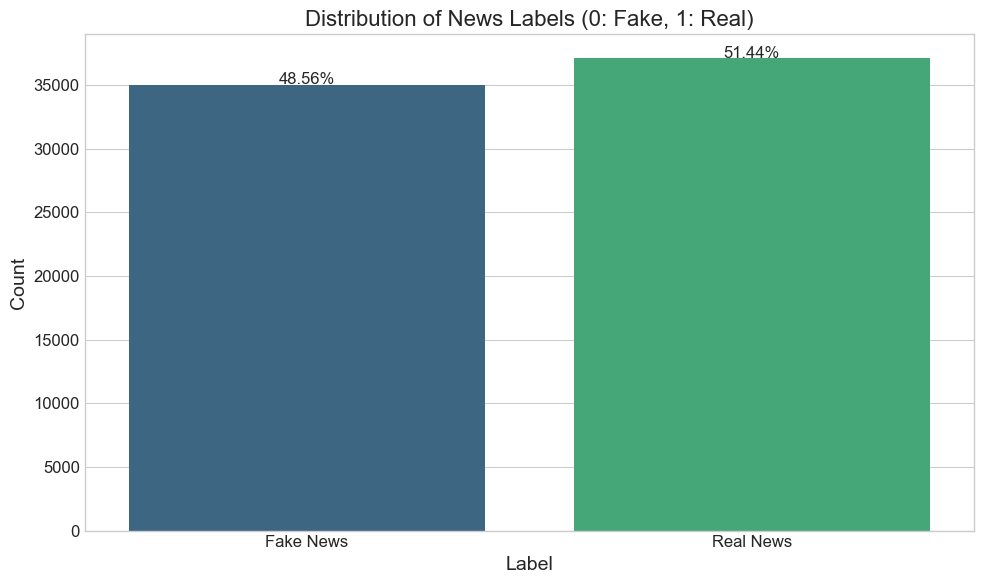

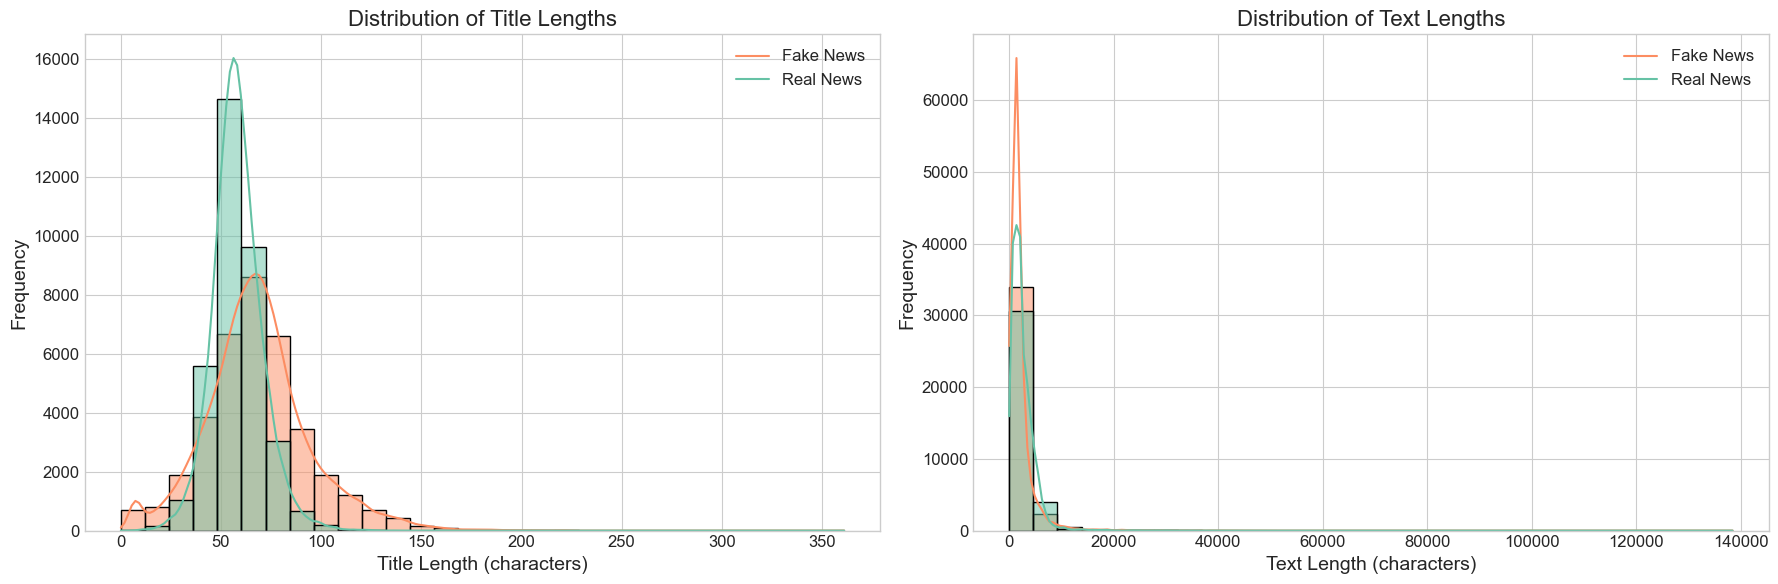


Extracting features using TF-IDF...
Feature matrix shape: (72134, 5000)
Title features: (72134, 1000)
Text features: (72134, 4000)
Training set: (54100, 5000), Test set: (18034, 5000)

Label distribution:
label
1    0.514404
0    0.485596
Name: proportion, dtype: float64

Training Random Forest...
Random Forest Performance:
Accuracy Score: 0.9667
F1 Score: 0.9667
Precision Score: 0.9668
Recall Score: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8871
           1       0.96      0.97      0.97      9163

    accuracy                           0.97     18034
   macro avg       0.97      0.97      0.97     18034
weighted avg       0.97      0.97      0.97     18034



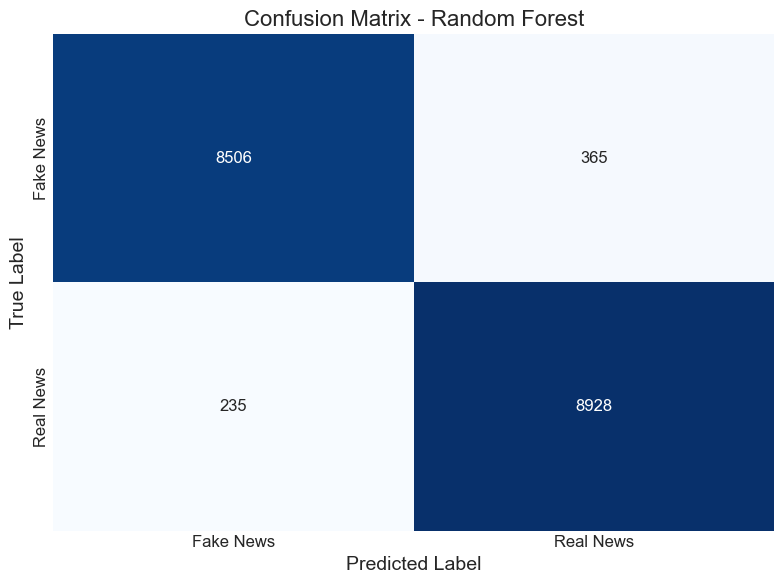


Training Logistic Regression...
Logistic Regression Performance:
Accuracy Score: 0.9638
F1 Score: 0.9638
Precision Score: 0.9639
Recall Score: 0.9638

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8871
           1       0.96      0.97      0.96      9163

    accuracy                           0.96     18034
   macro avg       0.96      0.96      0.96     18034
weighted avg       0.96      0.96      0.96     18034



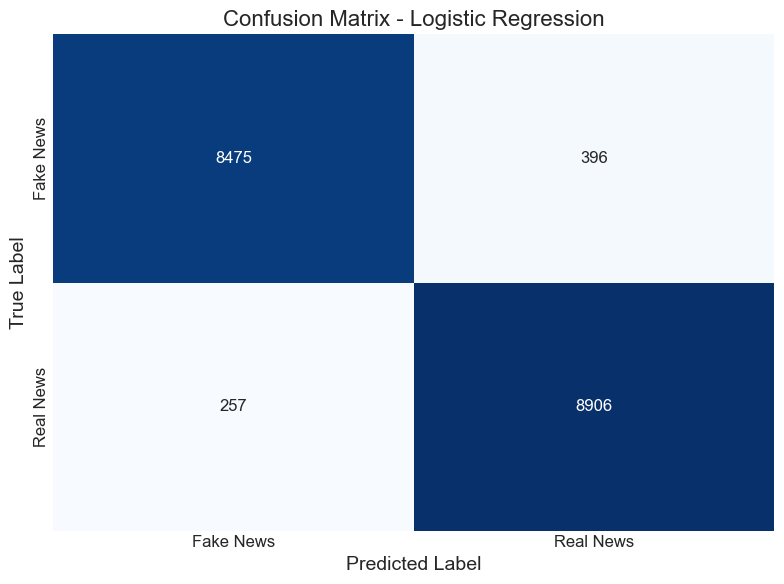


Training XGBoost...
XGBoost Performance:
Accuracy Score: 0.9748
F1 Score: 0.9748
Precision Score: 0.9751
Recall Score: 0.9748

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8871
           1       0.96      0.99      0.98      9163

    accuracy                           0.97     18034
   macro avg       0.98      0.97      0.97     18034
weighted avg       0.98      0.97      0.97     18034



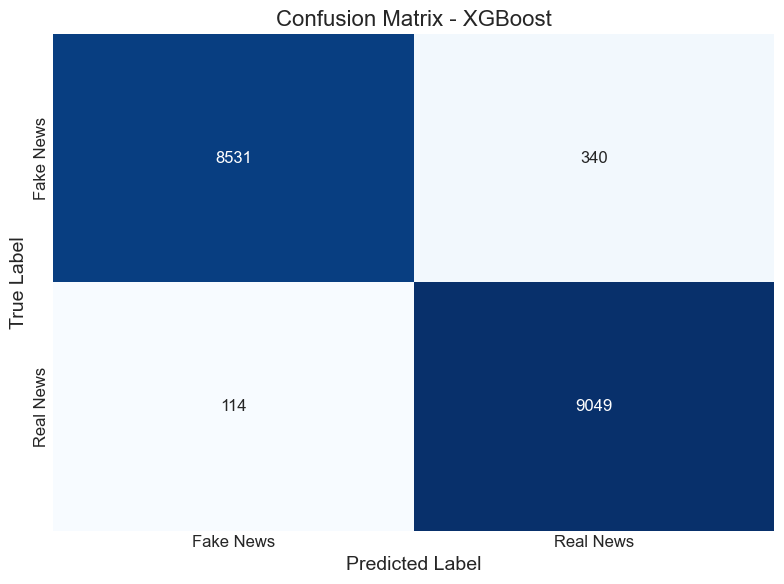

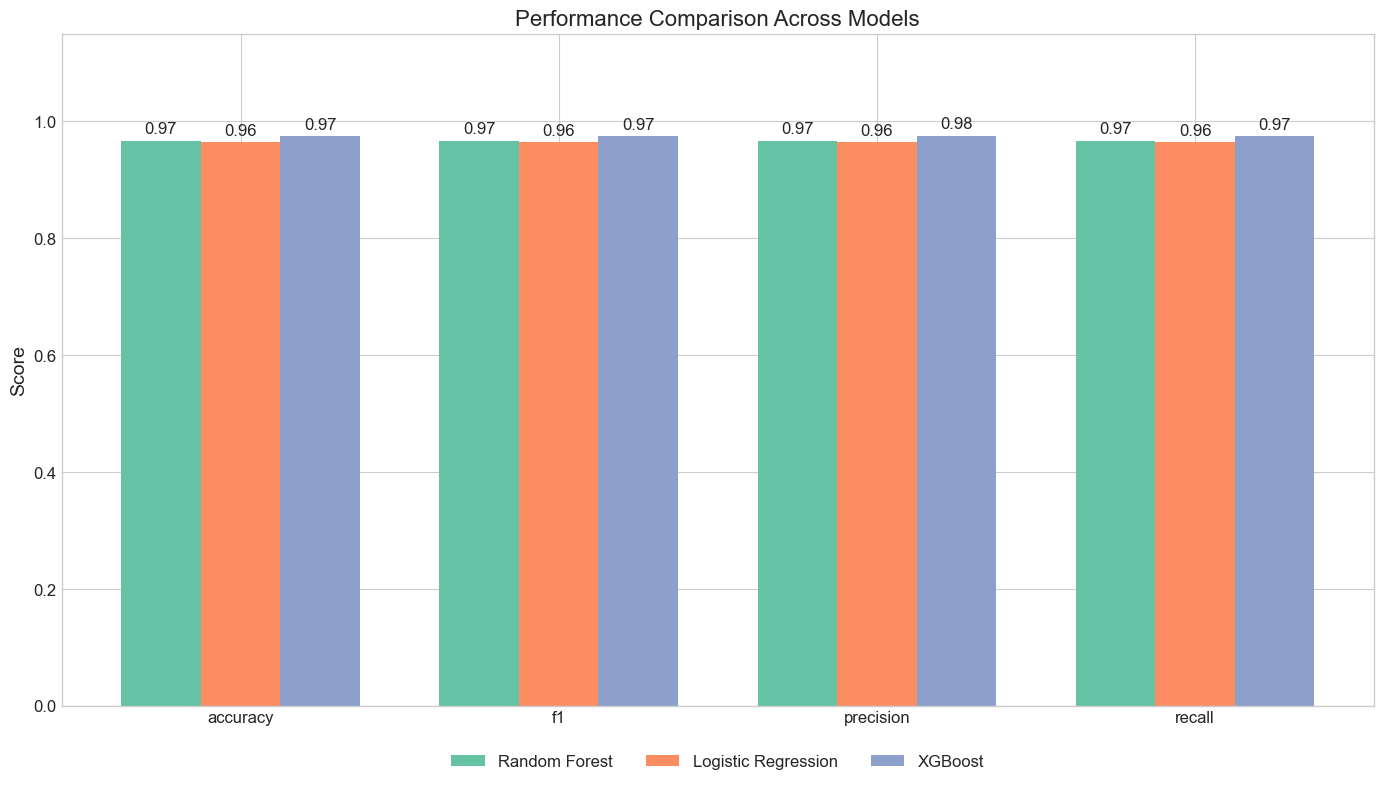

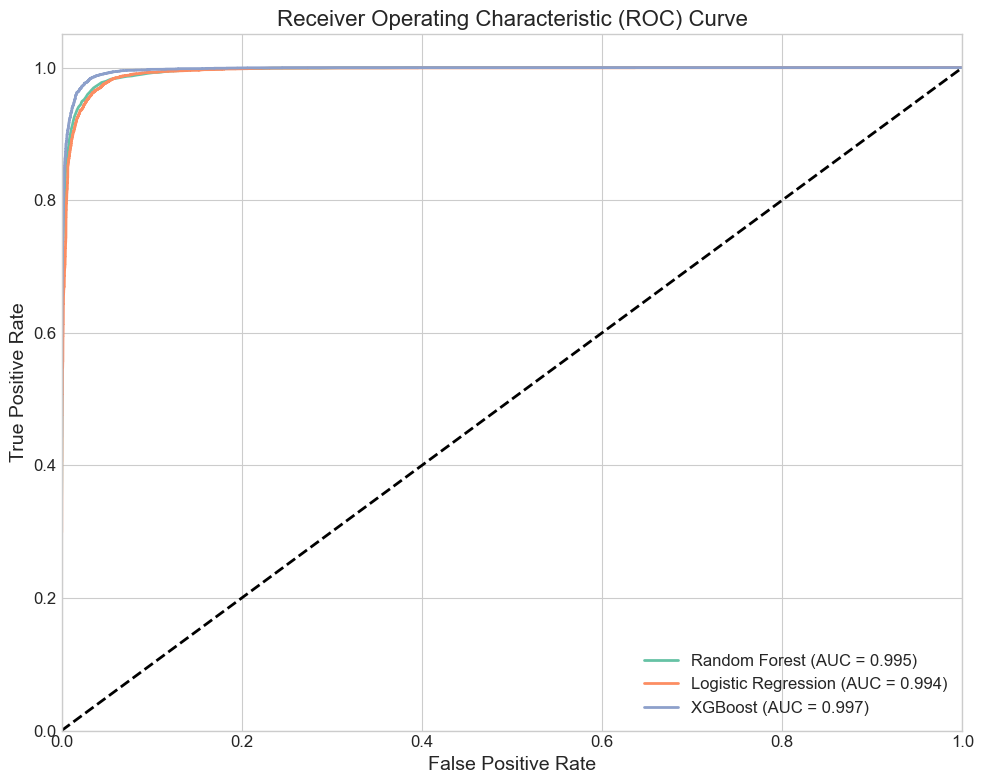

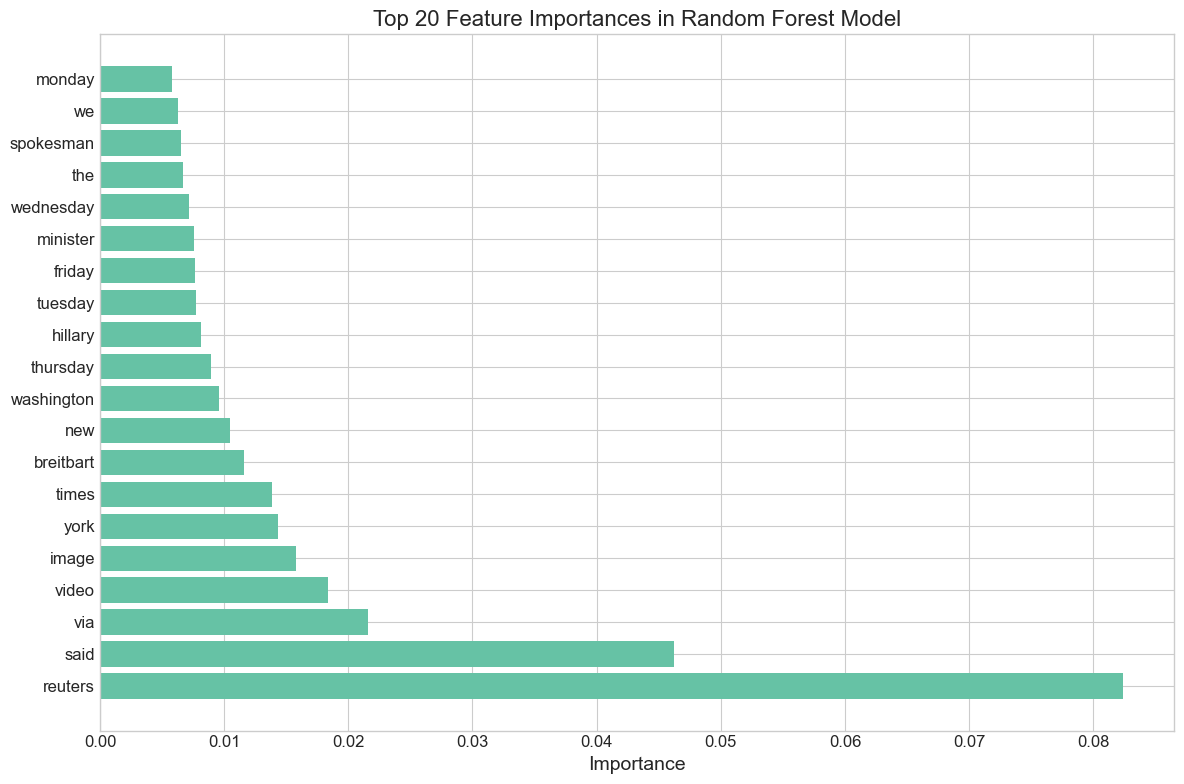

C:\Users\hp\AppData\Local\Temp\ipykernel_3020\1635219062.py:310: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis', ax=ax2)
C:\Users\hp\AppData\Local\Temp\ipykernel_3020\1635219062.py:314: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Fake News', 'Real News'])
C:\Users\hp\AppData\Local\Temp\ipykernel_3020\1635219062.py:342: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette='viridis', ax=ax4)
C:\Users\hp\AppData\Local\Temp\ipykernel_3020\1635219062.py:346: UserWarning: set_ticklabels() should only be used with 

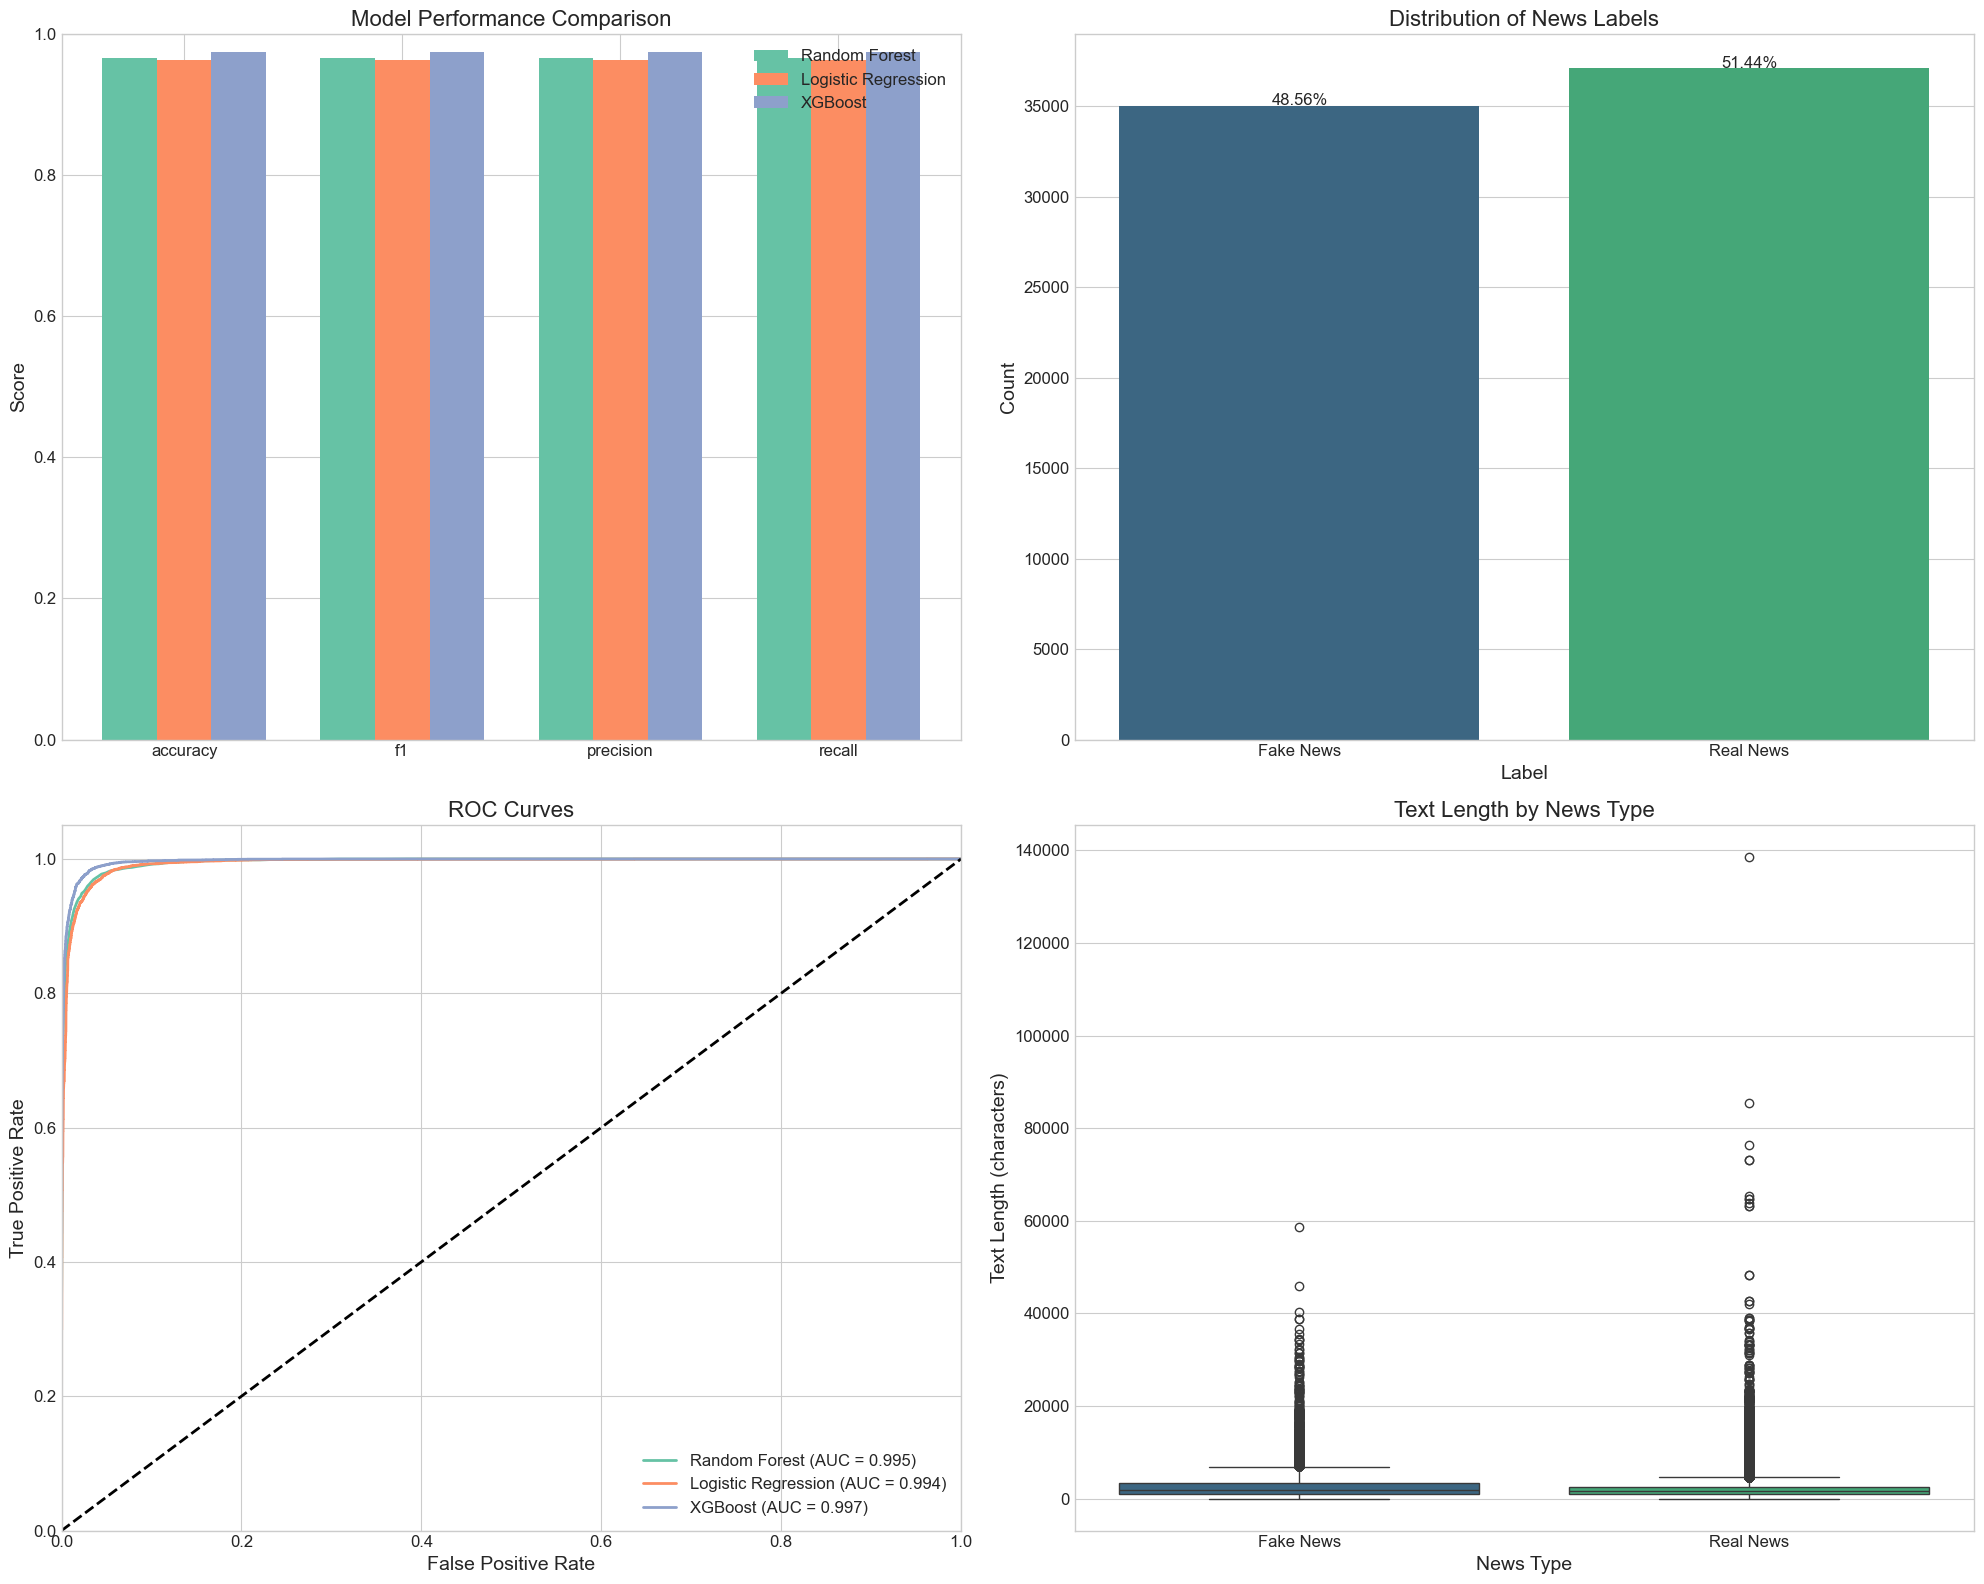


Visualization of model results complete!


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from scipy.sparse import hstack
import nltk
import string
from nltk.corpus import stopwords
import matplotlib.ticker as ticker
from sklearn.metrics import roc_curve, auc
from matplotlib.gridspec import GridSpec

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load the dataset
df = pd.read_csv("C:/Users/hp/Downloads/WELFake_Dataset.csv/WELFake_Dataset.csv")

# Display basic information
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head(5))

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

# Create a bar plot for missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='coral')
plt.title('Missing Values in Each Column', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Columns', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('missing_values.png')
plt.show()

# Fill missing values
df['text'].fillna('Unknown', inplace=True)
df['title'].fillna('Unknown', inplace=True)
print("\nMissing Values after filling:")
print(df.isnull().sum())

# Download stopwords if not already downloaded
nltk.download('stopwords', quiet=True)

# Text preprocessing function
def TextPreprocessing(text):
    if not isinstance(text, str):  # If text is not a string (e.g., int, float, NaN)
        text = str(text)  # Convert to string
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    stop_words = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing
df['text'] = df['text'].apply(TextPreprocessing)
df['title'] = df['title'].apply(TextPreprocessing)

# Visualize label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of News Labels (0: Fake, 1: Real)', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Fake News', 'Real News'])

# Add percentages on top of bars
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2.,
            height + 5,
             '{:1.2f}%'.format(100 * height/total),
            ha="center", fontsize=12)

plt.tight_layout()
plt.savefig('label_distribution.png')
plt.show()

# Analyze text length
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)

# Create length distribution plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Title length distribution by label
sns.histplot(data=df, x='title_length', hue='label', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Title Lengths', fontsize=16)
axes[0].set_xlabel('Title Length (characters)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].legend(['Fake News', 'Real News'])

# Text length distribution by label
sns.histplot(data=df, x='text_length', hue='label', bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Text Lengths', fontsize=16)
axes[1].set_xlabel('Text Length (characters)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].legend(['Fake News', 'Real News'])

plt.tight_layout()
plt.savefig('length_distributions.png')
plt.show()

# Feature extraction
print("\nExtracting features using TF-IDF...")
title_vectorizer = TfidfVectorizer(max_features=1000)
text_vectorizer = TfidfVectorizer(max_features=4000)

X_title = title_vectorizer.fit_transform(df['title'])
X_text = text_vectorizer.fit_transform(df['text'])

# Combine features
X = hstack([X_title, X_text])
print(f"Feature matrix shape: {X.shape}")
print(f"Title features: {X_title.shape}")
print(f"Text features: {X_text.shape}")

# Split dataset
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Check distribution of labels
label_dist = df['label'].value_counts(normalize=True)
print("\nLabel distribution:")
print(label_dist)

# Function to evaluate and visualize model performance
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, results_dict):
    # Train the model
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # For ROC curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Store results
    results_dict[model_name] = {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'y_pred': y_pred,
        'y_prob': y_prob
    }
    
    # Print results
    print(f"{model_name} Performance:")
    print(f"Accuracy Score: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision Score: {precision:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16)
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.xticks([0.5, 1.5], ['Fake News', 'Real News'])
    plt.yticks([0.5, 1.5], ['Fake News', 'Real News'])
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{model_name.replace(" ", "_").lower()}.png')
    plt.show()
    
    return results_dict

# Create a dictionary to store results
results = {}

# Evaluate Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
results = evaluate_model(rf_model, "Random Forest", X_train, X_test, y_train, y_test, results)

# Evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
results = evaluate_model(lr_model, "Logistic Regression", X_train, X_test, y_train, y_test, results)

# Evaluate XGBoost
xgb_model = XGBClassifier(random_state=42)
results = evaluate_model(xgb_model, "XGBoost", X_train, X_test, y_train, y_test, results)

# Compare models' performance
models = list(results.keys())
metrics = ['accuracy', 'f1', 'precision', 'recall']

# Create a comparison bar chart
plt.figure(figsize=(14, 8))
x = np.arange(len(metrics))
width = 0.25
multiplier = 0

for model_name, result in results.items():
    metric_values = [result[metric] for metric in metrics]
    offset = width * multiplier
    rects = plt.bar(x + offset, metric_values, width, label=model_name)
    plt.bar_label(rects, fmt='%.2f', padding=3)
    multiplier += 1

plt.ylabel('Score', fontsize=14)
plt.title('Performance Comparison Across Models', fontsize=16)
plt.xticks(x + width, metrics)
plt.ylim(0, 1.15)  # Adjust y-axis to make room for labels
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig('roc_curves.png')
plt.show()

# Feature importance analysis for Random Forest
if hasattr(rf_model, 'feature_importances_'):
    # Combine feature names from both vectorizers
    title_features = title_vectorizer.get_feature_names_out()
    text_features = text_vectorizer.get_feature_names_out()
    
    all_features = np.concatenate([title_features, text_features])
    
    # Get top 20 features
    feature_importances = rf_model.feature_importances_
    
    # Sort features by importance
    indices = np.argsort(feature_importances)[-20:]
    
    plt.figure(figsize=(12, 8))
    plt.title('Top 20 Feature Importances in Random Forest Model', fontsize=16)
    plt.barh(range(20), feature_importances[indices], align='center')
    plt.yticks(range(20), [all_features[i] if i < len(all_features) else "Feature "+str(i) for i in indices])
    plt.gca().invert_yaxis()  # Highest values at the top
    plt.xlabel('Importance', fontsize=14)
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

# Dashboard of key findings
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(2, 2, figure=fig)

# Top-left: Model comparison
ax1 = fig.add_subplot(gs[0, 0])
x = np.arange(len(metrics))
width = 0.25
multiplier = 0

for model_name, result in results.items():
    metric_values = [result[metric] for metric in metrics]
    offset = width * multiplier
    rects = ax1.bar(x + offset, metric_values, width, label=model_name)
    multiplier += 1

ax1.set_ylabel('Score', fontsize=14)
ax1.set_title('Model Performance Comparison', fontsize=16)
ax1.set_xticks(x + width)
ax1.set_xticklabels(metrics)
ax1.set_ylim(0, 1.0)
ax1.legend()

# Top-right: Label distribution
ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(x='label', data=df, palette='viridis', ax=ax2)
ax2.set_title('Distribution of News Labels', fontsize=16)
ax2.set_xlabel('Label', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_xticklabels(['Fake News', 'Real News'])

total = len(df)
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2.,
            height + 5,
             '{:1.2f}%'.format(100 * height/total),
            ha="center", fontsize=12)

# Bottom-left: ROC curve
ax3 = fig.add_subplot(gs[1, 0])
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
    roc_auc = auc(fpr, tpr)
    ax3.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

ax3.plot([0, 1], [0, 1], 'k--', lw=2)
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('False Positive Rate', fontsize=14)
ax3.set_ylabel('True Positive Rate', fontsize=14)
ax3.set_title('ROC Curves', fontsize=16)
ax3.legend(loc="lower right")
ax3.grid(True)

# Bottom-right: Text length comparison
ax4 = fig.add_subplot(gs[1, 1])
sns.boxplot(x='label', y='text_length', data=df, palette='viridis', ax=ax4)
ax4.set_title('Text Length by News Type', fontsize=16)
ax4.set_xlabel('News Type', fontsize=14)
ax4.set_ylabel('Text Length (characters)', fontsize=14)
ax4.set_xticklabels(['Fake News', 'Real News'])

plt.tight_layout()
plt.savefig('dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization of model results complete!")